CLASSIFICAZIONE BINARIA

In [1]:
!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/parkinsons.csv

--2022-04-19 19:33:47--  https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/esercizi/parkinsons.csv
Resolving frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)... 52.95.149.98
Connecting to frenzy86.s3.eu-west-2.amazonaws.com (frenzy86.s3.eu-west-2.amazonaws.com)|52.95.149.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38273 (37K) [text/csv]
Saving to: ‘parkinsons.csv’

parkinsons.csv      100%[===================>]  37.38K  --.-KB/s    in 0.09s   

2022-04-19 19:33:47 (423 KB/s) - ‘parkinsons.csv’ saved [38273/38273]



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve
from sklearn.metrics import f1_score,auc, classification_report

import warnings
warnings.filterwarnings('ignore')


In [4]:
df = pd.read_csv('parkinsons.csv')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [ ]:
df.shape

(195, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552,0.753846
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119,0.431878
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539,0.000000
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451,1.000000
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052,1.000000
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980,1.000000
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367,1.000000


#EDA

In [ ]:
df['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

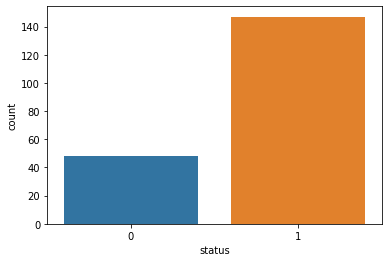

In [ ]:
sns.countplot(df['status']);

NON BILANCIATO

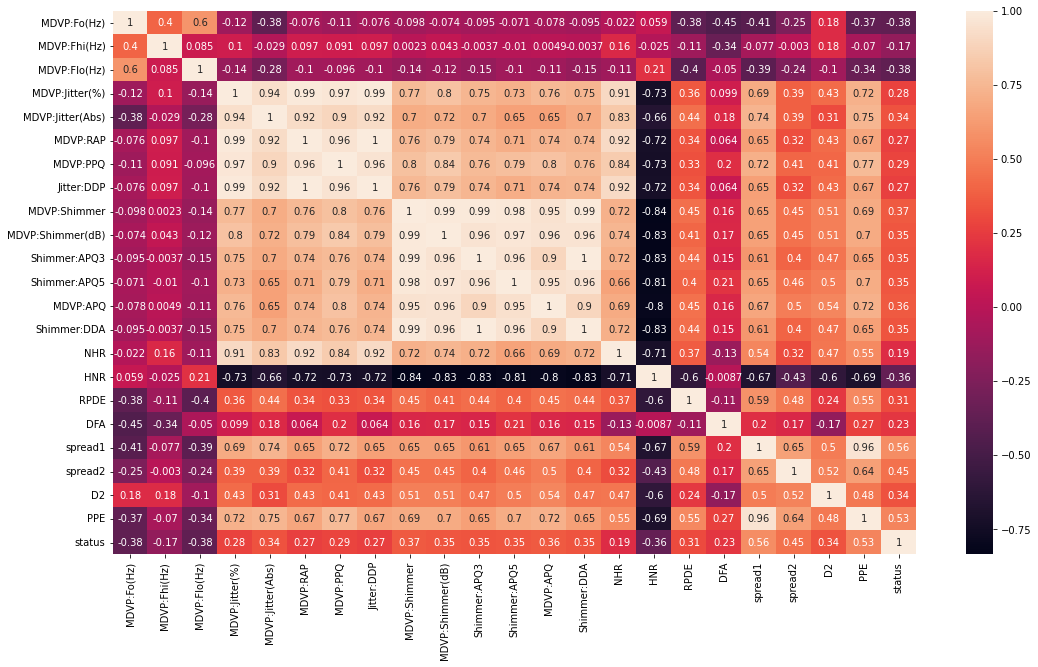

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
sns.pairplot(df,hue='status', corner=True);

Output hidden; open in https://colab.research.google.com to view.

In [5]:
df = df.drop('name', axis=1)

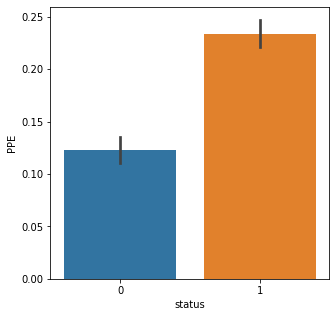

In [ ]:
#PPE VS status
plt.figure(figsize=(5,5))

sns.barplot(x='status', y = 'PPE', data = df)

0 --> No Parkinson

1 --> Parkinson

# FEATURES E TARGET

In [6]:
# separating features and target
X = df.drop(columns='status', axis=1)
y = df['status']

# STANDARDIZZAZIONE

In [7]:
sc = StandardScaler()
standardized_data = sc.fit_transform(X)
X_ = standardized_data
X_

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.48047686,
        -0.21053082,  0.86888575],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.31118546,
         0.27507712,  1.80360503],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.01768236,
        -0.10362861,  1.40266141],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -0.81807931,
         0.78033848, -0.83241014],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.22906571,
        -0.63700298, -0.92610456],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.43085284,
         0.45480231, -0.64505466]])

#Train & Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_,y,
                                                    test_size = 0.2,
                                                    random_state=667
                                                    )

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


#BEST MODEL

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [10]:
model_collection = []

model_collection.append(LogisticRegression(solver='liblinear'))
model_collection.append(RandomForestClassifier())
model_collection.append(SVC())
model_collection.append(KNeighborsClassifier())
model_collection.append(DecisionTreeClassifier())
model_collection.append(GaussianNB())

In [11]:
model_list = ['Logistic_Regression','Random_Forest','SVC','KNN','DecisionTree','Naive_Bayes']
acc_list = []
f1_list = []
cm_list = []

for model in model_collection:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc_list.append(accuracy_score(y_test,y_pred))
    f1_list.append(f1_score(y_test,y_pred,average='macro'))
    cm_list.append(confusion_matrix(y_test,y_pred))

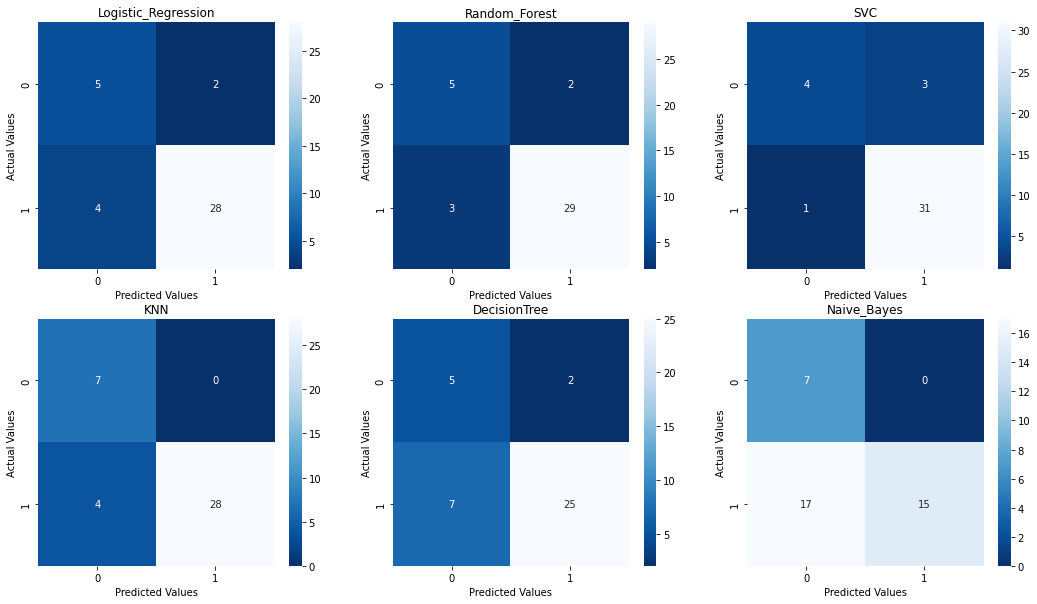

In [12]:
fig = plt.figure(figsize=(18,10))
for i in range(len(cm_list)):
    cm = cm_list[i]
    model = model_list[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    cm_plot = sns.heatmap(cm, annot=True,cmap='Blues_r')
    cm_plot.set_xlabel('Predicted Values')
    cm_plot.set_ylabel('Actual Values')

In [13]:
for model in model_collection:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model)
    print(classification_report(y_test,model.predict(X_test)))

LogisticRegression(solver='liblinear')
              precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.93      0.88      0.90        32

    accuracy                           0.85        39
   macro avg       0.74      0.79      0.76        39
weighted avg       0.87      0.85      0.85        39

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.94      0.94      0.94        32

    accuracy                           0.90        39
   macro avg       0.83      0.83      0.83        39
weighted avg       0.90      0.90      0.90        39

SVC()
              precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.91      0.97      0.94        32

    accuracy                           0.90        39
   macro avg       0.86      0.77      0.80        39
weig

In [14]:
result_df = pd.DataFrame({
                            'Model':model_list,
                            'Accuracy':acc_list,
                            'F1':f1_list
                          })
result_df.sort_values(by=['F1'],ascending=False)

,Model,Accuracy,F1
3,KNN,0.897436,0.855556
2,SVC,0.897436,0.803030
1,Random_Forest,0.871795,0.793651
0,Logistic_Regression,0.846154,0.764113
4,DecisionTree,0.769231,0.686887
5,Naive_Bayes,0.564103,0.544955


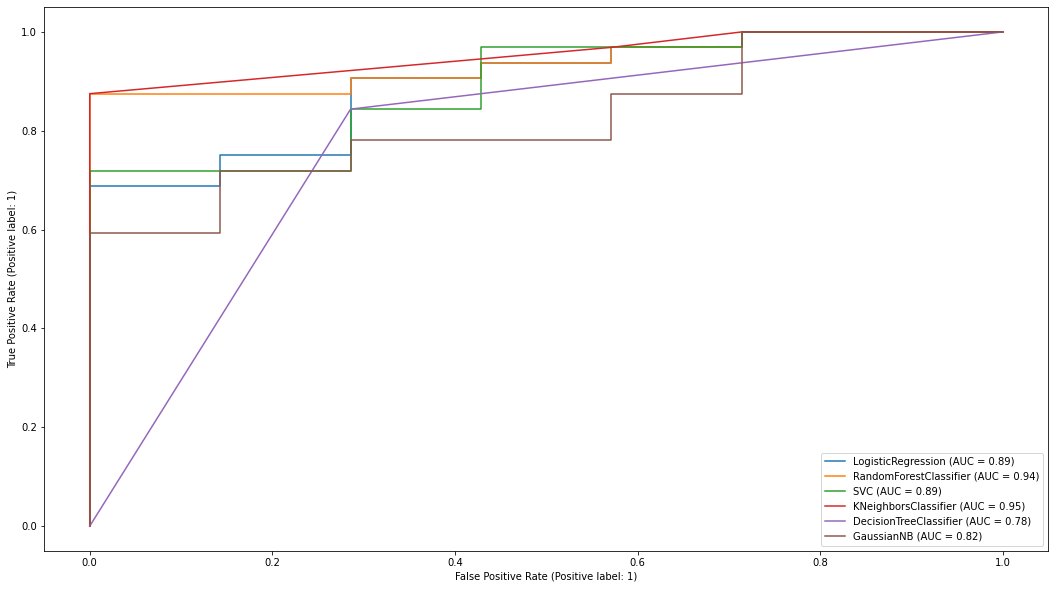

In [15]:
from sklearn.metrics import plot_roc_curve

plt.figure(figsize=(18,10))
ax = plt.gca()

for cls in model_collection:
    cls.fit(X_train, y_train)
    plot_roc_curve(cls, X_test, y_test, ax=ax)

## Training the Model

In [16]:
classifier = KNeighborsClassifier()

In [17]:
#training the classifier
classifier.fit(X_train, y_train)

KNeighborsClassifier()

#MODEL EVALUATION

##ACCURACY SCORE

In [18]:
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)

print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.8974358974358975


0 --> No Parkinson

1 --> Parkinson

In [19]:
labels = ['No Parkinson', 'Parkinson']

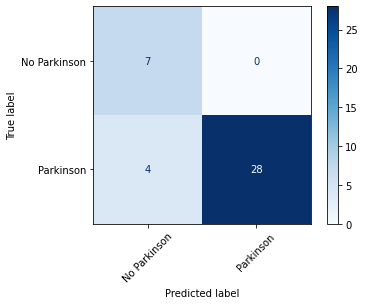

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_estimator(classifier, 
                                      X_test, 
                                      y_test,
                                      cmap='Blues',
                                      display_labels=labels,
                                      xticks_rotation=45,
                                      )
cm;

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=labels))

              precision    recall  f1-score   support

No Parkinson       0.64      1.00      0.78         7
   Parkinson       1.00      0.88      0.93        32

    accuracy                           0.90        39
   macro avg       0.82      0.94      0.86        39
weighted avg       0.93      0.90      0.91        39



##ROC Curves

In [22]:
!pip install plot-metric --quiet

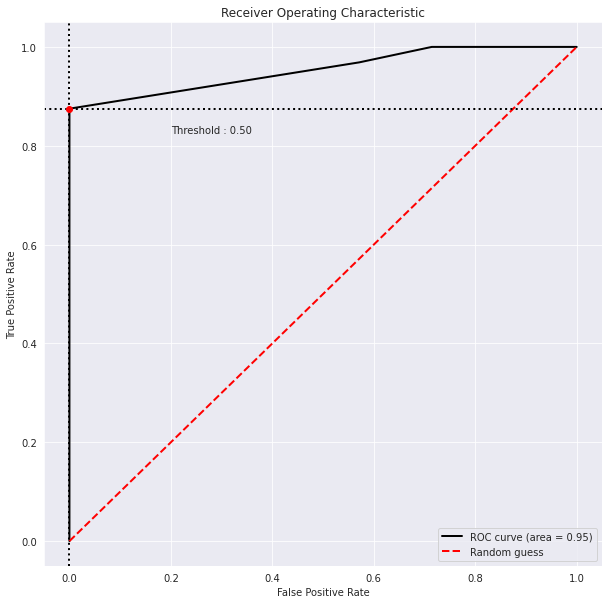

In [23]:
from plot_metric.functions import BinaryClassification
y_pred_proba = classifier.predict_proba(X_test)[::,1]

#labels = ['class1', 'class2']
bc = BinaryClassification(y_test, y_pred_proba, labels=labels)

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve();

In [24]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.9531250000000001

##P-R Curves

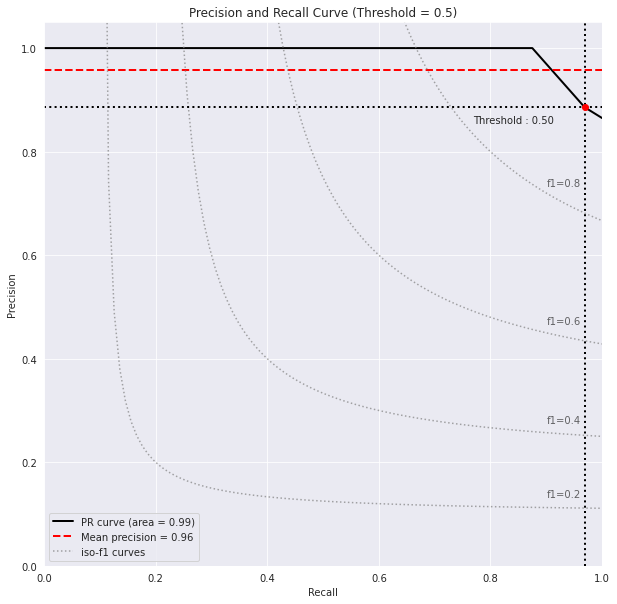

In [25]:
# Figures
plt.figure(figsize=(10,10))
bc.plot_precision_recall_curve();

##Building a Predictive System

In [ ]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [26]:
input_data = (119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)

# changing the input data to a numpy array
input_np = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_np.reshape(1,-1)

std_data = sc.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction[0])

if (prediction[0]==1):
  print('Parkinson')
else:
  print('No Parkinson')

[[-0.82929965 -0.43616456 -0.95203729  0.33491386  0.74975946  0.13296255
   0.76080023  0.13175532  0.74598495  0.73953578  0.60785907  1.11914677
   0.33298451  0.60753214 -0.06789281 -0.19322537 -0.8078385   1.76081412
   0.80132308  0.48047686 -0.21053082  0.86888575]]
1
Parkinson


#Feature selection
Check the Pipeline performance with feature selection

In [31]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

featu=[]
for i in range(2,len(X.columns)):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    #classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=5)
    classifier = KNeighborsClassifier()
    pipe = Pipeline([
                    ('scaler', StandardScaler()),
                    ('featureselection',rfe),
                    ('classifier',classifier)
                    ])
    pipe.fit(X_train,y_train)
    test_y_pred = pipe.predict(X_test)
    test_acc = accuracy_score(y_test, test_y_pred)
    y_pred_proba = pipe.predict_proba(X_test)[::,1]
    roc_auc = roc_auc_score(y_test,y_pred_proba)
    featu.append(roc_auc)
    # summarize progress
    print('feature selected %d, Acc.Test: %.3f, AUC: %.3f' % (i, test_acc, roc_auc ))

print('\n Best number of feature selection is: %d' % (np.argmax(featu) +2))

feature selected 2, Acc.Test: 0.872, AUC: 0.944
feature selected 3, Acc.Test: 1.000, AUC: 1.000
feature selected 4, Acc.Test: 0.923, AUC: 0.975
feature selected 5, Acc.Test: 0.897, AUC: 0.955
feature selected 6, Acc.Test: 0.897, AUC: 0.973
feature selected 7, Acc.Test: 0.897, AUC: 0.964
feature selected 8, Acc.Test: 0.897, AUC: 0.973
feature selected 9, Acc.Test: 0.923, AUC: 0.978
feature selected 10, Acc.Test: 0.923, AUC: 0.978
feature selected 11, Acc.Test: 0.923, AUC: 0.978
feature selected 12, Acc.Test: 0.923, AUC: 0.978
feature selected 13, Acc.Test: 0.897, AUC: 0.978
feature selected 14, Acc.Test: 0.923, AUC: 0.969
feature selected 15, Acc.Test: 0.923, AUC: 0.978
feature selected 16, Acc.Test: 0.923, AUC: 0.993
feature selected 17, Acc.Test: 0.923, AUC: 0.955
feature selected 18, Acc.Test: 0.897, AUC: 0.942
feature selected 19, Acc.Test: 0.872, AUC: 0.933
feature selected 20, Acc.Test: 0.923, AUC: 0.955
feature selected 21, Acc.Test: 0.897, AUC: 0.942

 Best number of feature sel

#Pipeline
Always give not normalize data to train the Pipeline!

Attenta a:

test_size

n_features

max_depth

In [ ]:
# X = features not standardized
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.20,
                                                    random_state=667
                                                    )

In [32]:
standardize = StandardScaler()
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
#classifier = RandomForestClassifier(random_state=667, n_estimators=100,max_depth=5)
classifier = KNeighborsClassifier()

pipe = Pipeline([
                ('scaler', StandardScaler()),
                ('featureselection',rfe),
                ('classifier',classifier)
                ])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('featureselection',
                 RFE(estimator=DecisionTreeClassifier(),
                     n_features_to_select=3)),
                ('classifier', KNeighborsClassifier())])

In [33]:
input_data = (119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.0313,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654)

prediction = pipe.predict([input_data])
print(prediction[0])

if (prediction[0] == 0):
  print('No Parkinson')
else:
  print('Parkinson')

1
Parkinson


In [34]:
import joblib
joblib.dump(pipe,'pipe_parkinsons.pkl')

['pipe_parkinsons.pkl']

In [35]:
uploaded_model = joblib.load('pipe_parkinsons.pkl')

uploaded_model.predict([input_data])[0] 

1